In [ ]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# loading the dataset
ds = pd.read_csv("robot_inverse_kinematics_dataset.csv")
ds.head(10)

,q1,q2,q3,q4,q5,q6,x,y,z
0,-1.5100,-0.763,1.85,-0.817,0.9120,2.320,-0.09470,0.1500,0.301
1,-2.8400,0.520,1.58,-1.270,-1.3900,0.617,0.14200,-0.1000,0.225
2,-1.2300,0.695,1.22,-1.130,0.0343,6.270,-0.08330,0.2230,0.206
3,-1.9900,1.060,1.74,-1.760,-1.2400,4.760,0.13500,-0.0314,0.370
4,1.0500,0.836,1.34,-1.890,0.4840,4.380,-0.05600,-0.2290,0.260
5,0.7620,-0.717,1.86,1.250,0.4770,6.110,-0.16800,-0.0712,0.245
6,-0.0943,-1.010,1.35,2.370,-0.6350,4.870,0.00422,-0.0616,0.120
7,-1.3800,1.390,1.34,-2.530,0.6260,3.610,-0.09540,0.2350,0.355
8,2.7500,-0.358,1.65,-1.480,-1.2800,3.170,-0.00242,-0.1500,0.209
9,-1.4200,-0.747,1.28,-0.146,-1.0300,0.128,0.04480,-0.1690,0.049


In [ ]:
ds.shape

(15000, 9)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      15000 non-null  float64
 1   q2      15000 non-null  float64
 2   q3      15000 non-null  float64
 3   q4      15000 non-null  float64
 4   q5      15000 non-null  float64
 5   q6      15000 non-null  float64
 6   x       15000 non-null  float64
 7   y       15000 non-null  float64
 8   z       15000 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [ ]:
# Perform any necessary data cleaning and preparation steps
# Check if there duplicated rows
dup_rows = ds.duplicated()
num_dups = dup_rows.sum()
print(num_dups)

0


In [ ]:
# Splitting the Data
X = ds[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']]
y = ds[['x', 'y', 'z']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Choosing a Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Training the Model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
# Evaluating the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  0.0016924461950030467
Mean Absolute Error (MAE):  0.03199675760272224
R-squared (R2):  0.8494942059349753


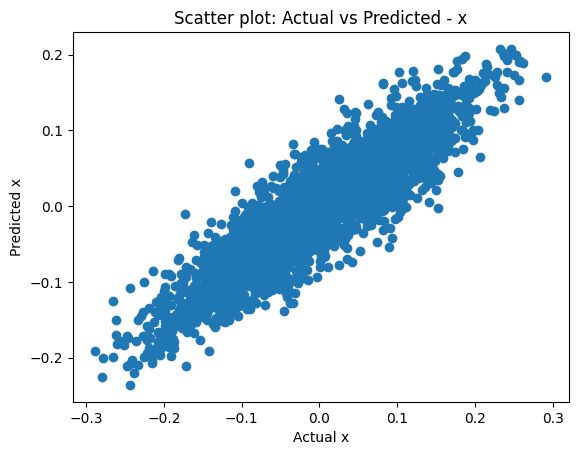

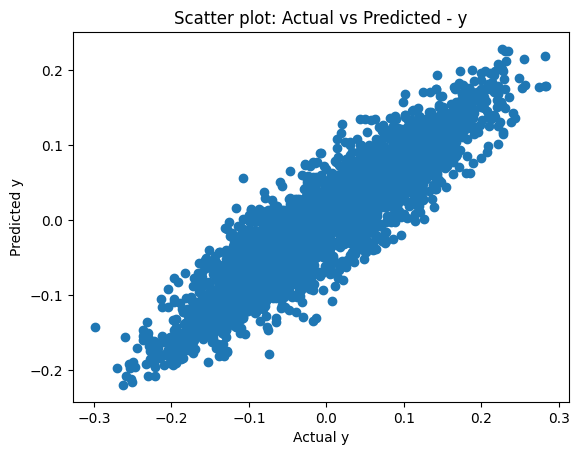

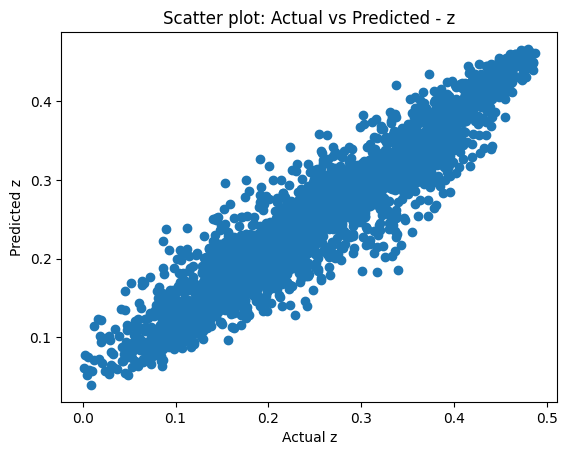

In [ ]:
# Visualize predicted vs actual values for x
plt.scatter(y_test['x'], y_pred[:, 0])
plt.xlabel('Actual x')
plt.ylabel('Predicted x')
plt.title('Scatter plot: Actual vs Predicted - x')
plt.show()

# Visualize predicted vs actual values for y
plt.scatter(y_test['y'], y_pred[:, 1])
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot: Actual vs Predicted - y')
plt.show()

# Visualize predicted vs actual values for z
plt.scatter(y_test['z'], y_pred[:, 2])
plt.xlabel('Actual z')
plt.ylabel('Predicted z')
plt.title('Scatter plot: Actual vs Predicted - z')
plt.show()

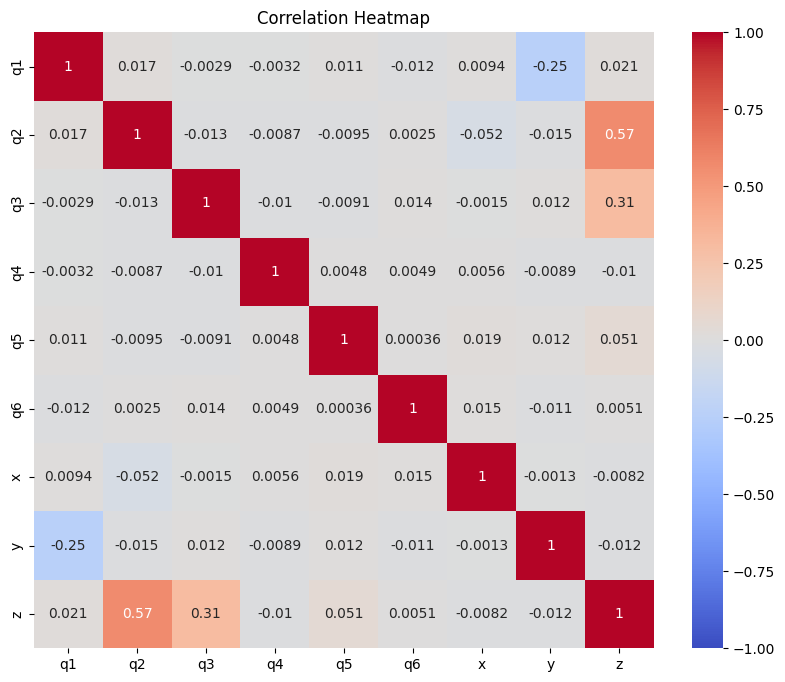

In [ ]:
# Compute the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

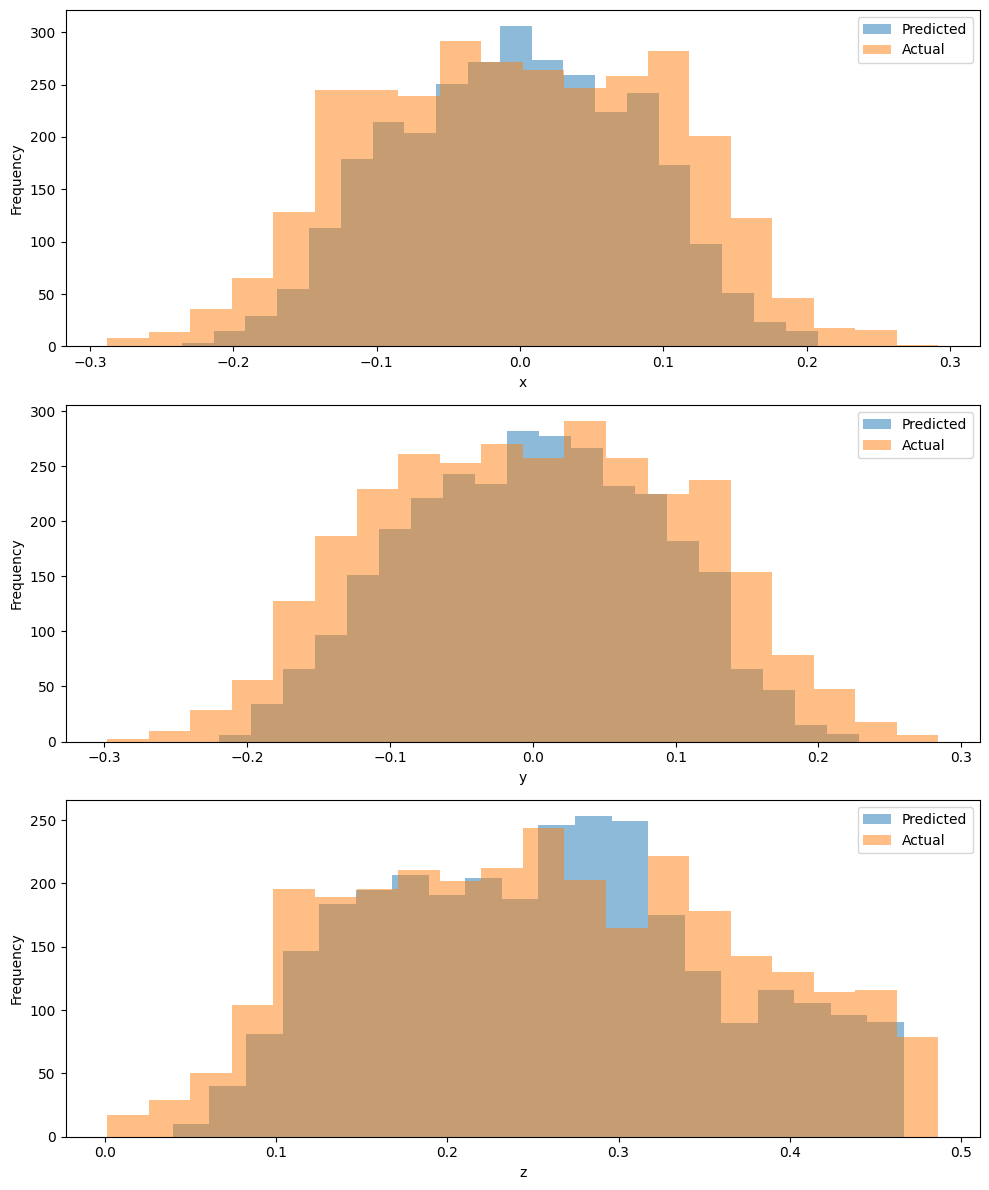

In [ ]:
# Visualization using histogram
predicted_values = y_pred  # Replace with your predicted values
actual_values = y_test  # Replace with your actual values

# Create histograms for each target variable
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Histogram for x
axs[0].hist(predicted_values[:, 0], bins=20, alpha=0.5, label='Predicted')
axs[0].hist(actual_values.iloc[:, 0], bins=20, alpha=0.5, label='Actual')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Histogram for y
axs[1].hist(predicted_values[:, 1], bins=20, alpha=0.5, label='Predicted')
axs[1].hist(actual_values.iloc[:, 1], bins=20, alpha=0.5, label='Actual')
axs[1].set_xlabel('y')
axs[1].set_ylabel('Frequency')
axs[1].legend()

# Histogram for z
axs[2].hist(predicted_values[:, 2], bins=20, alpha=0.5, label='Predicted')
axs[2].hist(actual_values.iloc[:, 2], bins=20, alpha=0.5, label='Actual')
axs[2].set_xlabel('z')
axs[2].set_ylabel('Frequency')
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Testing for application

# Assuming you have a new data point for prediction with joint variables q1, q2, q3, q4, q5, q6
new_data = [[-1.51, -0.763, 1.85, -0.817, 0.912, 2.32]]

# Make predictions
predicted_output = model.predict(new_data)

# Access the predicted x, y, z values
predicted_x = predicted_output[0][0]
predicted_y = predicted_output[0][1]
predicted_z = predicted_output[0][2]

# Print the predicted inverse kinematics
print("Predicted x: ", predicted_x)
print("Predicted y: ", predicted_y)
print("Predicted z: ", predicted_z)

Predicted x:  -0.06385797999999981
Predicted y:  0.1445427999999999
Predicted z:  0.28207399999999994


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
